In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [4]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

C:\Users\rikes\AppData\Local\Temp\ipykernel_16348\599713381.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [5]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]

In [6]:
series_1 = series.diff().dropna()

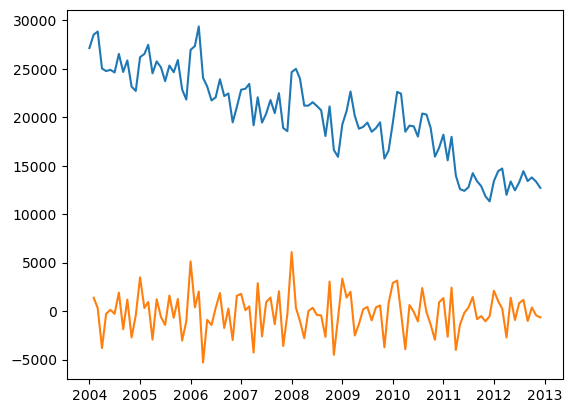

In [7]:
plt.plot(series)
plt.plot(series_1)

In [8]:
series_2 = series_1.diff().dropna()

In [9]:
perform_adf_test(series_2)

ADF Statistic: -7.162321
p-value: 0.000000


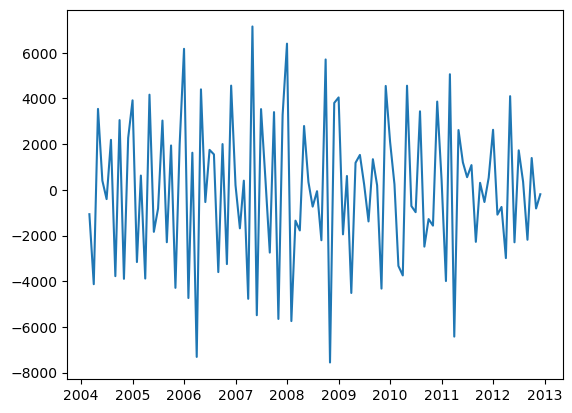

In [10]:
plt.plot(series_2)

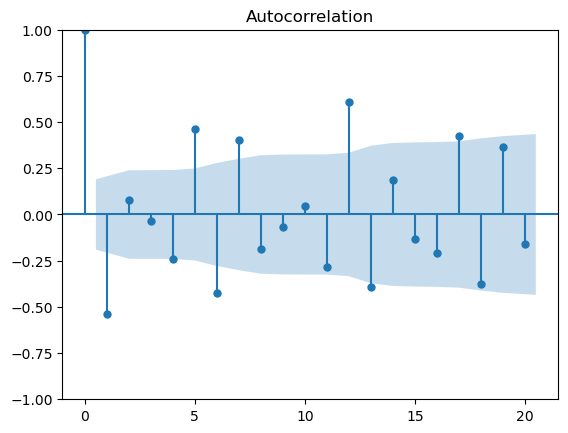

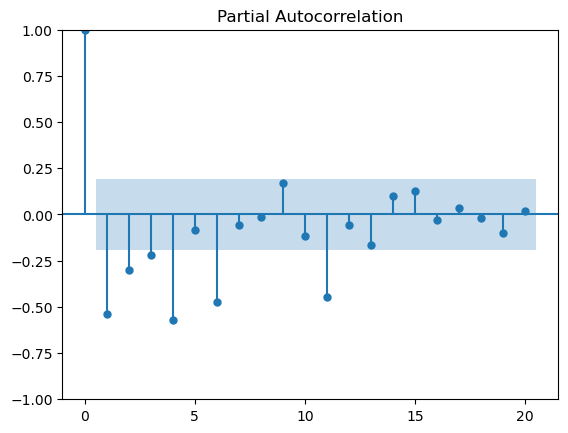

In [11]:
plot_acf(series_2, lags=20)
plot_pacf(series_2, lags=20)
plt.show()

In [12]:
ar_orders = [1, 2, 3]
ma_orders = [5, 6, 7]
fitted_model_dict = {}

for ar_order in ar_orders:
    for ma_order in ma_orders:
        # Create ARMA(p,q) model
        arma_model = ARIMA(series_2, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit

C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series_2, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

# Print AIC and BIC scores for each combination

C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,1) - AIC: 1925.101919460765, BIC: 1935.7556758372132
ARMA(1,2) - AIC: 1929.6905945852159, BIC: 1943.0077900557762
ARMA(2,1) - AIC: 1924.155957357229, BIC: 1937.4731528277894
ARMA(2,2) - AIC: 1921.7774018845282, BIC: 1937.7580364492005


In [15]:
train_end = datetime(2011,12,1)
test_end = datetime(2012,12,1)

train_data = series_2[:train_end]
test_data = series_2[train_end + timedelta(days=1):test_end]

In [16]:
model = ARIMA(train_data, order=(2,1,2))

In [17]:
model_fit = model.fit()

C:\Users\rikes\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   94
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -864.804
Date:                Sun, 08 Sep 2024   AIC                           1739.608
Time:                        12:46:41   BIC                           1752.271
Sample:                    03-01-2004   HQIC                          1744.721
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3752      0.101    -13.655      0.000      -1.573      -1.178
ar.L2         -0.6232      0.095     -6.561      0.000      -0.809      -0.437
ma.L1         -0.1632      0.159     -1.025      0.3

In [19]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [20]:
pred_end_date

Timestamp('2012-12-01 00:00:00')

In [21]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [22]:
predictions

2012-01-01   -438.582254
2012-02-01    205.148292
2012-03-01    -77.747459
2012-04-01    -89.872690
2012-05-01    103.096829
2012-06-01   -154.716393
2012-07-01     79.570542
2012-08-01    -81.954003
2012-09-01     -5.830327
2012-10-01     -9.855810
2012-11-01    -51.758784
2012-12-01      8.374297
Freq: MS, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Sales')

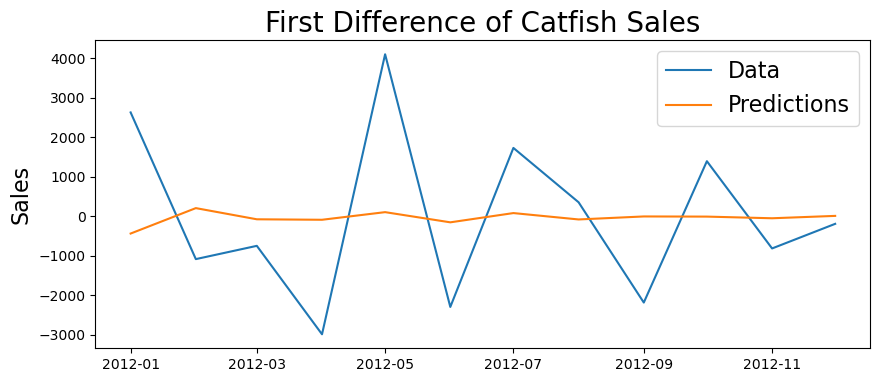

In [23]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [24]:
def invert_diff(last_actual, differences):
    inverted_values = []
    last_observation = last_actual
    for diff in differences:
        inverted_value = last_observation + diff
        inverted_values.append(inverted_value)
        last_observation = inverted_value
    return inverted_values

In [25]:
actual_values = pd.Series([100, 105, 110, 115, 120])

# Sample differenced data (assuming first order differencing)
differenced_data = pd.Series([5, 5, 5, 5])

# Sample model forecast (assuming one-step-ahead forecast)

In [26]:
actual_values = pd.Series([100, 105, 110, 115, 120])
actual_values.iloc[-1]

120

In [27]:
invert_diff(actual_values.iloc[-1],differenced_data)

[125, 130, 135, 140]

In [31]:
!nvidia-smi

Sun Sep  8 13:43:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              7W /   80W |     199MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----